<a href="https://colab.research.google.com/github/solobala/MDS27/blob/main/MDS27_itog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import *
import scipy
import pandas as pd
%matplotlib inline
from scipy.optimize import curve_fit
import warnings


### Задание 1
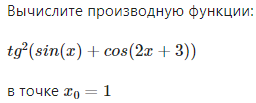

In [ ]:
# Получим ф-ю в виде SymPy
x = sym.Symbol('x')
str_expression = '(tan(sin(x) + cos(2*x +3)))**2'
expression = sym.sympify(str_expression)
expression

tan(sin(x) + cos(2*x + 3))**2

In [ ]:
# Получим выражения для производной в общем виде
result = sym.diff(expression,x)
result

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [ ]:
# Найдем значение 1 производной ф-ии  в точке x0=1
a=np.array([1])
f1 = lambdify(x, result, "numpy")
print(f'Значение производной функции {expression} в точке x0=1 = {f1(a)[0]}')

Значение производной функции tan(sin(x) + cos(2*x + 3))**2 в точке x0=1 = 55.385917635337854


### Задание 2
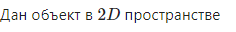

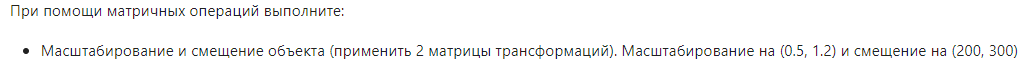

In [ ]:
A = np.array([])
def init(A):
  """
  Задаем исходную матрицу
  """
  A = np.array([
  [-100, -100, 1],
  [0, 100, 1],
  [100, -100, 1],
  [-100, -100, 1]
  ])
  return A

In [ ]:
def get_draw(A,x_move,y_move):
  """
  Инициализирует исходную матрицу.
  Выводит чертеж фигуры с вершинами,
  кoординаты которых содержатся в строках матрицы А.
  Учитывает смещение x_move, y_move, z_move
  Возвращает матрицу
  """

  x = A[:,0]
  y = A[:,1]
  plt.plot(x, y)
  plt.ylim([-200+x_move, 200+y_move])
  plt.xlim([-200+x_move, 200+y_move])
  return(A) 

In [ ]:
def get_stretch(x,y,z,A, x_move, y_move):
  """
  Выполняет растяжение - сжатие по осям x,y,z
  в соответствии с передаваемыми коэффициентами
  """
  B = np.array([[x,0,0],[0,y,0],[0,0,z]])
  res = B @ A.transpose()
  tt = res.transpose()
  get_draw(tt,x_move, y_move)
  return tt

In [ ]:
def move(x,y,z,A):
  """
  Выполняет смещение вдоль заданных осей 
  """
  B = np.array([[x,y,z],[x,y,z], [x,y,z], [x,y,z]])
  A+=B
  get_draw(A, x,y)
  print(f'A= {A}')

array([[-100, -100,    1],
       [   0,  100,    1],
       [ 100, -100,    1],
       [-100, -100,    1]])

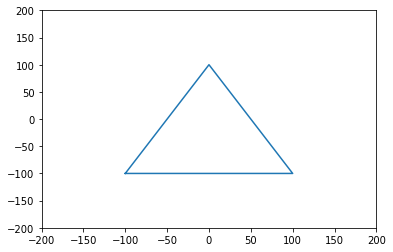

In [ ]:
# Исходный рисунок
get_draw(init(A),0,0)

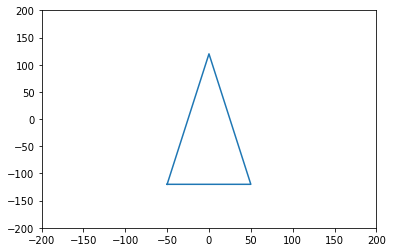

In [ ]:
# Первая трансформация - масштабирование на (0.5, 1.2)
A = get_stretch(0.5,1.2,1,init(A),0,0)

In [ ]:
A # результат 1 трансформации

array([[ -50., -120.,    1.],
       [   0.,  120.,    1.],
       [  50., -120.,    1.],
       [ -50., -120.,    1.]])

A= [[150. 180.   2.]
 [200. 420.   2.]
 [250. 180.   2.]
 [150. 180.   2.]]


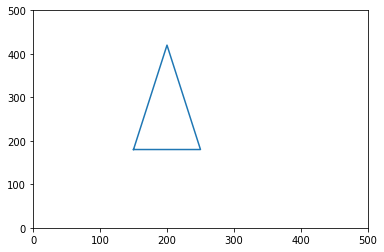

In [ ]:
# Вторая трансформация - смещение на (200, 300)
move(200,300,1,A)

### Задание 3
Найдите собственные значения и собственные вектора матрицы:

In [ ]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [ ]:
znach, vektors = np.linalg.eig(m)
print(f'Собственные значения матрицы: {znach}')
print(f'Собственные вектора матрицы: {vektors}') 

Собственные значения матрицы: [ 3. -1.]
Собственные вектора матрицы: [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


### Задание 4
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

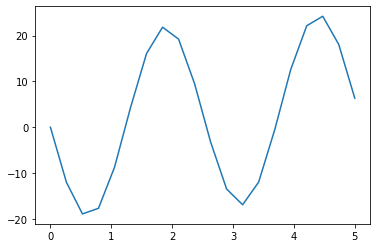

In [ ]:
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [ ]:
warnings.filterwarnings('ignore')
methods = ['lm', 'trf','dogbox'] # тестируемые методы
res = curve_fit(f, xdata=x, ydata=fx, p0=np.array([-3, 3]), method='lm') # начальные значения a и b
err_min = 0
final_res = np.array([])
 
err_min = error(res[0])  # начальная величина погрешности - база для сравнения
for method in methods:
  for a in range(-3,3):
   for b in range(-3,3):
      try:
        res = curve_fit(f, xdata=x, ydata=fx, p0=np.array([a, b]), method=method)
        err = error(res[0])   
        if err < err_min:
          err_min = err
          final_res = np.array([res[0][0], res[0][1]])  
          final_method = method
      except  RuntimeError or RuntimeWarning:
        pass 
print(f'Метод оптимизации: {final_method}, a: {final_res[0]}, b: {final_res[1]}, погрешность: {err_min}')            

Метод оптимизации: trf, a: 3.000000000512699, b: -2.4999999994808166, погрешность: 1.5365083454454975e-06


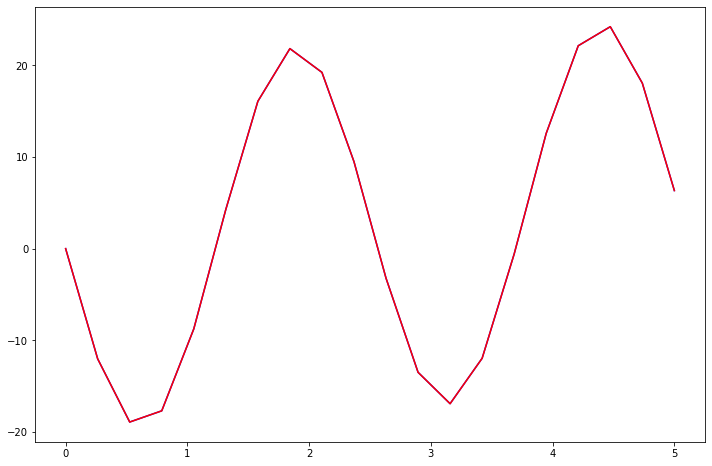

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(x, fx, color='blue')
plt.plot(x, f(x, final_res[0], final_res[1]), color='red')
plt.show()

### Задание 5.
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов)). Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [ ]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [ ]:
def cosine( a, b ):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    aLength = np.linalg.norm(a)
    bLength = np.linalg.norm(b)
    
    return np.dot(a, b) / (aLength * bLength)

In [ ]:
def get_pair(i, matrix):
  """
  На входе - номер строки матрицы и сама матрицы
  Возвращает кортеж из 3 элементов: 
  исходного номера строки, наиболее близкого номера строки j, 
  косинусного сходства result
  """
  dim = matrix.shape  # определяем размеры исходной матрицы
  cosinus = 0
  result = 0 
  j_max = 0 
  for j in range(dim[0]):
    if i != j:
      cosinus = cosine(matrix[i,:],matrix[j,:])
      if cosinus > result:
        result = cosinus
        j_max = j
  return(i, j_max, result)        

In [ ]:
dim=raitings.shape  # определяем размеры исходной матрицы
print(f'Пары наиболее похожих пользователей: ')
for i in range(dim[0]):
  result =  get_pair(i, raitings)
  print(f' {result[:2]}, косинусное сходство: {result[2]}')



Пары наиболее похожих пользователей: 
 (0, 8), косинусное сходство: 0.9106598233573044
 (1, 4), косинусное сходство: 0.8713805223930228
 (2, 9), косинусное сходство: 0.9187305147356807
 (3, 9), косинусное сходство: 0.8588686958710952
 (4, 8), косинусное сходство: 0.8794847716076252
 (5, 9), косинусное сходство: 0.8551490764118892
 (6, 3), косинусное сходство: 0.832742107055763
 (7, 5), косинусное сходство: 0.8445168512565341
 (8, 0), косинусное сходство: 0.9106598233573044
 (9, 2), косинусное сходство: 0.9187305147356807
